<a href="https://colab.research.google.com/github/AbbySnt/EstadisticaAplicada_1990002/blob/main/3erParcial_YASH_1990002_EAG44_nov2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tercer parcial

Yessica Abigail Santiago Hernandez

1990002

Estadistica Aplicada Gpo 44

In [179]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive

In [180]:
#librerias especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from operator import add
#pmdarima
import pmdarima as pm
plt.rcParams['figure.figsize'] = (10,6)

In [181]:
#Base de datos
mr = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')

## Muestre de que tipo son las variables del dataframe, revise que no haya missing values (de haberlos imputar valores). Cersiorarse que exista una variable fecha, que sea el index y tenga una frecuencia asignada

In [182]:
mr.head()

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0
3,1995/04,3491.0,3321.0
4,1995/05,3109.0,3777.0


In [183]:
#tipo de variables
mr.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [184]:
#missing values
mr.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [185]:
#formato fecha
mr['mes']=pd.to_datetime(mr['mes'],format= '%Y/%m')
#index
mr = mr.set_index('mes')
#frecuencia
mr = mr.asfreq('MS')

In [186]:
mr.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

## Análisis  exploratorio.  Utilizando  código  de  Python  genera  un  print()para  cada una de la siguiente información

a)Rango de fechas

In [187]:
inicio = mr.index.min()
final = mr.index.max()
print(f'El rango de las fechas es:{inicio} a {final}')

El rango de las fechas es:1995-01-01 00:00:00 a 2023-08-01 00:00:00


b)Número de observaciones

In [188]:
mr.count()

miles de pasajeros           344
ingresos (miles de pesos)    344
dtype: int64

c)Valor mínimo y valor máximo del número de pasajeros

In [189]:
min = mr['miles de pasajeros'].min().round(2)
max = mr['miles de pasajeros'].max().round(2)
print(f'El valor minimo es: {min}\nEl valor maximo es: {max}')

El valor minimo es: 2397.0
El valor maximo es: 17534.52


## Grafica lo siguiente

La serie de miles de pasajeros

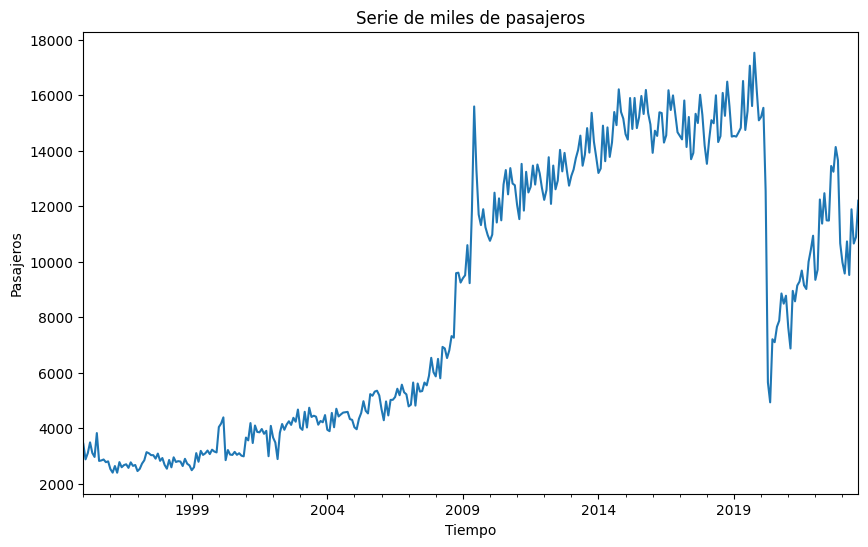

In [190]:
mr['miles de pasajeros'].plot()
plt.title('Serie de miles de pasajeros')
plt.ylabel('Pasajeros')
plt.xlabel('Tiempo')
plt.show()

Una media móvil centrada a 7 meses, y explica si la serie tiene tendencia o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.

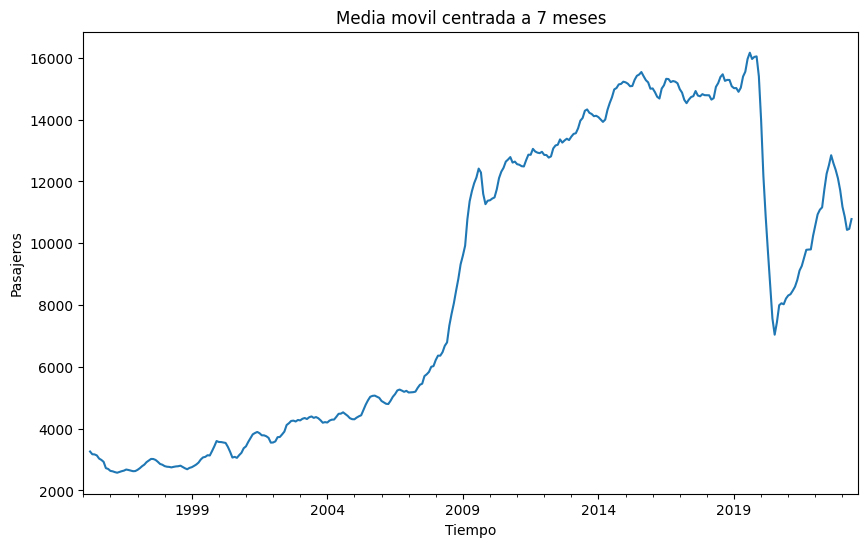

In [191]:
mr['PMS-7'] = mr['miles de pasajeros'].rolling(7, center = True).mean()
mr['PMS-7'].plot()
plt.title('Media movil centrada a 7 meses')
plt.xlabel('Tiempo')
plt.ylabel('Pasajeros')
plt.show()

**La serie de miles de pasajeros tiene una tendencia creciente.
Y de igual manera se pueden persibir ciclos, es decir, se visualizan caidas y subidas.**


#El director  de  Metrorrey  planea  hacer  mantenimiento  a  las  estaciones  y  los vagones,  pero  no  sabe  la  fecha  adecuada  para  hacerlo.  Utiliza  el  modelo  ETS para  obtener  el  componente  estacional  de  la  serie  y  señala  el  mes  o  meses adecuados para dar mantenimiento

In [192]:
ets = seasonal_decompose(mr['miles de pasajeros'], model='ad')

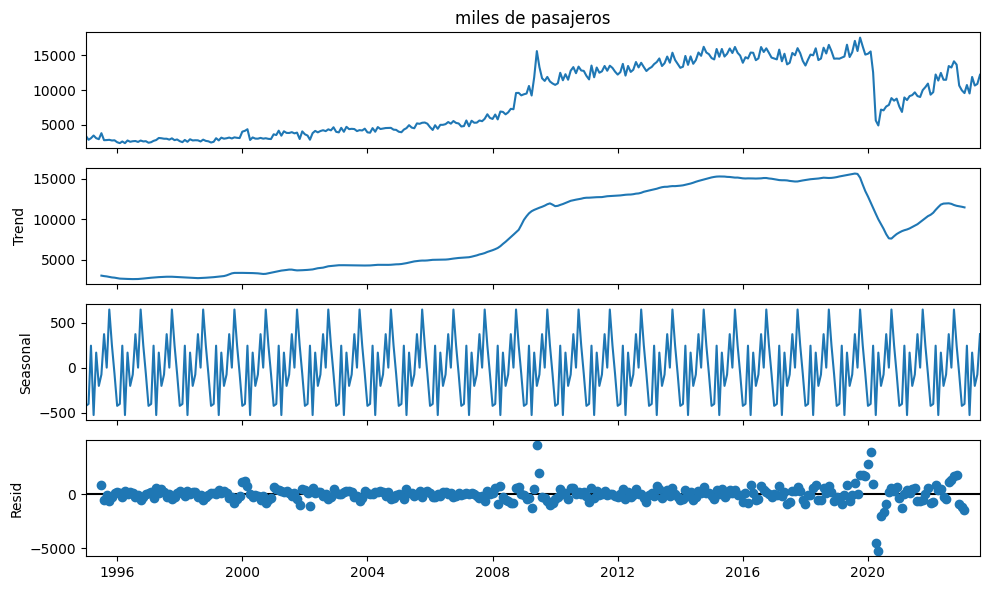

In [193]:
ets.plot()
plt.show()

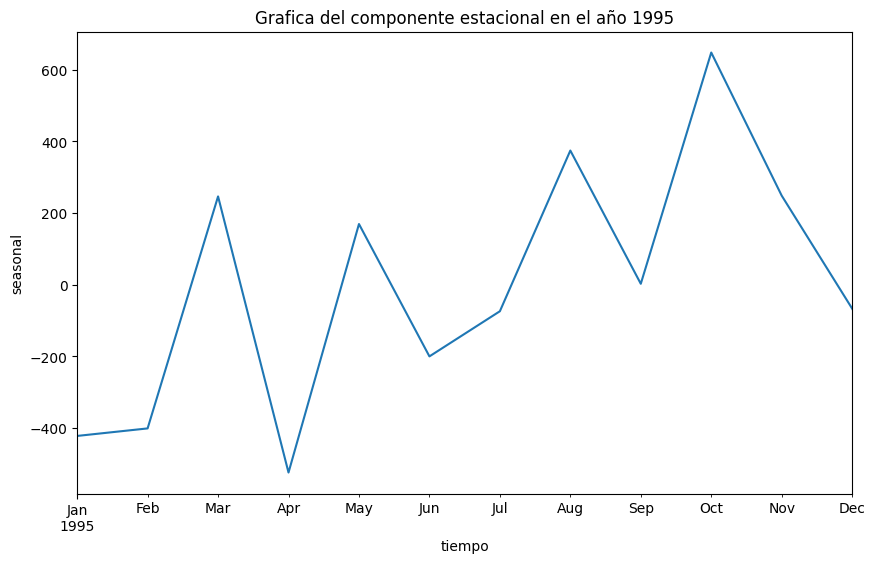

In [194]:
ets.seasonal.plot()
plt.title('Grafica del componente estacional en el año 1995')
plt.ylabel('seasonal')
plt.xlabel('tiempo')
plt.xlim('1995-01-01','1995-12-01')
plt.show()

In [195]:
ets.seasonal

mes
1995-01-01   -422.310072
1995-02-01   -401.322511
1995-03-01    246.389197
1995-04-01   -524.477048
1995-05-01    169.319975
                 ...    
2023-04-01   -524.477048
2023-05-01    169.319975
2023-06-01   -200.241576
2023-07-01    -74.189908
2023-08-01    374.483711
Freq: MS, Name: seasonal, Length: 344, dtype: float64

In [196]:
print(f'El mejor mes para hacer mantenimiento es en abril puesto que es el mes que tiene el menor componente estacional {ets.seasonal.min()}')

El mejor mes para hacer mantenimiento es en abril puesto que es el mes que tiene el menor componente estacional -524.4770483722807


## El  director  de  Metrorrey  quiere  saber  los  ingresos  por  pasaje  y  el  número  de pasajeros  los  siguientes  5  meses. Utiliza  el  método  de  Holt-Winters  para pronosticar  el  número  de  pasajeros los  próximos  5  meses,  cada  pronóstico multiplícalo por $7.1 para tener un estimado de los ingresos

In [197]:
holtwinters_model = ExponentialSmoothing(mr['miles de pasajeros'], trend = 'add', seasonal = 'mul',seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [198]:
pronostico_pasajerosM = holtwinters_model.forecast(5)

In [230]:
pronostico_pasajerosM

2023-09-01    11441.185911
2023-10-01    11998.364287
2023-11-01    11200.851863
2023-12-01    10433.610889
2024-01-01     9967.179612
Freq: MS, dtype: float64

In [199]:
p_ingresos= [pronostico_pasajerosM*7.1]

In [200]:
p_ingresos

[2023-09-01    81232.419972
 2023-10-01    85188.386439
 2023-11-01    79526.048227
 2023-12-01    74078.637313
 2024-01-01    70766.975244
 Freq: MS, dtype: float64]

##Realiza   un   pronóstico de   los   miles   de   pasajeros con   el   modelo   ARIMA cumpliendo los siguientes pasos

Realiza una prueba de raíz unitaria a la serie original

In [201]:
prueba_adf = adfuller(mr['miles de pasajeros'].dropna())
pvalue =  prueba_adf[1]
pvalue.round(2)

0.58

**Al tener un p-valor de 0.58 que es mayor al alfa de 0.05 no se rechaza Ho y por lo tanto la serie de miles de pasajeros no es una serie estacionaria**

En caso de que no sea estacionaria aplica primeras diferencias, y realiza la prueba de raíz unitaria para verificar que la serie sea estacionaria

In [202]:
mr['mr_diff'] = mr['miles de pasajeros'].diff()

In [203]:
prueba_adf1 = adfuller(mr['mr_diff'].dropna())
pvalue1 =  prueba_adf1[1]
pvalue1.round(2)

0.0

**Al tener un p-valor de 0.0 que es menor al alfa de 0.05 se rechaza Ho y por lo tanto la serie de las primeras diferencias de miles de pasajeros es una serie estacionaria**

Realiza  las  graficas  de  autocorrelación  de  la  serie  estacionaria  para verificar si la serie tiene o no un componente estacional

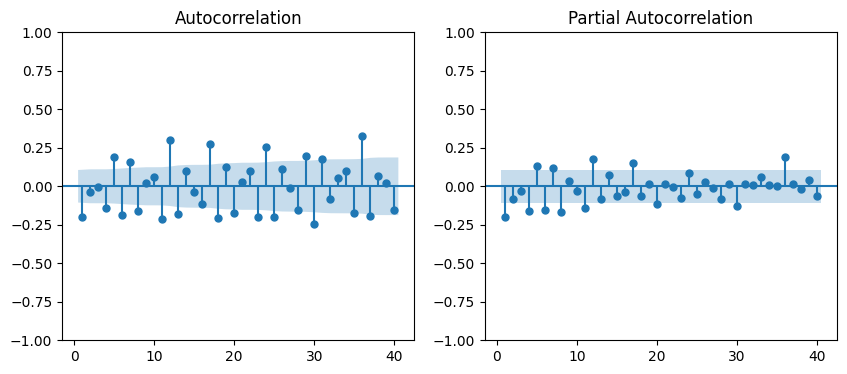

In [204]:
#Graficas de correlacion
ig,ax = plt.subplots(1,2,figsize=(10,4))
##1er subgrafica
plot_acf(mr['mr_diff'].dropna(),zero=False, lags =40, ax=ax[0])
##2da subgrafica
plot_pacf(mr['mr_diff'].dropna(),zero=False, lags=40, ax=ax[1])
plt.show()

**La serie si tiene un componente estacional**

Utiliza auto_arimapara encontrar el orden del modelo arima, dando el parámetro information_criterionprueba y muestra el resultado, con aic, bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula termina en par, sino termina en par elegir uno distinto a aic.

In [205]:
#aic
pm.auto_arima(mr['miles de pasajeros'],
              start_p=1, start_q=1,
              max_p=10,max_q=10,
              ic='aic',
              seasonal=True,
              m=12,
              start_P=1, start_Q=1,
              max_P=10,max_Q=10)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [206]:
#bic
pm.auto_arima(mr['miles de pasajeros'],
              start_p=1, start_q=1,
              max_p=10,max_q=10,
              ic='bic',
              seasonal=True,
              m=12,
              start_P=1, start_Q=1,
              max_P=10,max_Q=10)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [207]:
#hqic
pm.auto_arima(mr['miles de pasajeros'],
              start_p=1, start_q=1,
              max_p=10,max_q=10,
              ic='hqic',
              seasonal=True,
              m=12,
              start_P=1, start_Q=1,
              max_P=10,max_Q=10)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [208]:
#oob
pm.auto_arima(mr['miles de pasajeros'],
              start_p=1, start_q=1,
              max_p=10,max_q=10,
              ic='oob',
              seasonal=True,
              m=12,
              start_P=1, start_Q=1,
              max_P=10,max_Q=10)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

Con  el  orden  del  modelo  arima  obtenido  estima  el  modelo  arima

In [209]:
#Estimacion del modelo
model = ARIMA(mr['miles de pasajeros'],
              order=(1,1,3),
              seasonal_order=(1,0,1,12))

results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -2780.179
Date:                            Sat, 04 Nov 2023   AIC                           5568.359
Time:                                    23:50:14   BIC                           5583.710
Sample:                                01-01-1995   HQIC                          5574.474
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0395      0.028     -1.392      0.164      -0.095       0.016
ar.S.L12       0.9723      0.023   

Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza y la serie original desde 2021

In [212]:
mr.tail()

,miles de pasajeros,ingresos (miles de pesos),PMS-7,mr_diff,pasajeros arima
mes,,,,,
2023-04-01,9523.669,38799.657,10464.836857,-1210.233,9683.709733
2023-05-01,11891.646,58511.798,10782.866714,2367.977,10164.029618
2023-06-01,10657.712,55684.063,NaN,-1233.934,11421.549441
2023-07-01,10894.497,56378.304,NaN,236.785,10865.884805
2023-08-01,12201.982,57821.901,NaN,1307.485,11656.668280


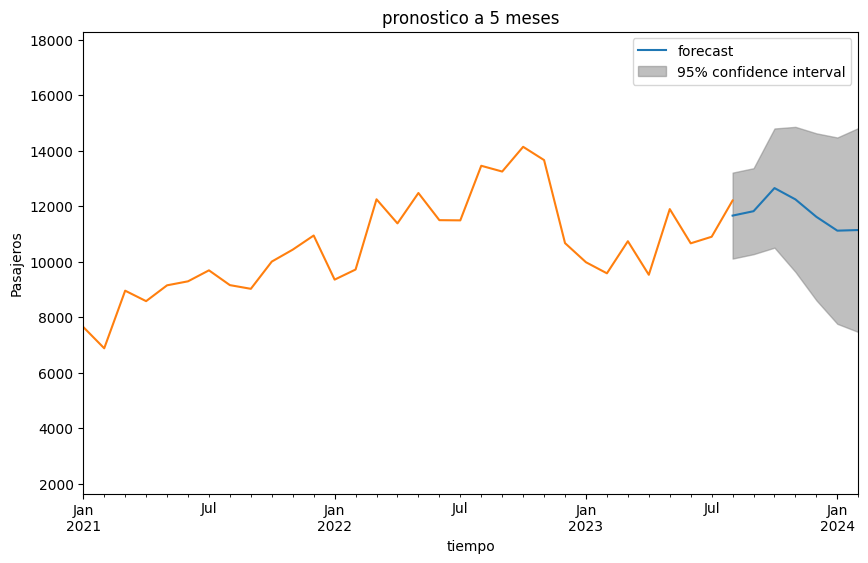

In [216]:
plot_predict(results,'2023-08-01','2024-02-01')
mr['miles de pasajeros'].plot()
plt.title('pronostico a 5 meses')
plt.xlim('2021-01-01','2024-02-01')
plt.xlabel('tiempo')
plt.ylabel('Pasajeros')
plt.show()

Realiza  el  pronostico  a  5  meses  con  los  intervalos  de  confianza

In [217]:
forecast = results.get_forecast(steps = 5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


In [218]:
inicio ='2023-08-01'
fin = '2024-02-01'

In [226]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos =forecast_ci.loc[inicio:fin]
pronostico_valor

2023-09-01    11815.725974
2023-10-01    12648.811045
2023-11-01    12240.674094
2023-12-01    11612.477938
2024-01-01    11114.025603
Freq: MS, Name: predicted_mean, dtype: float64

Calcula los ingresos y el intervalo de los ingreso multiplicando por $7.1

In [229]:
pronostico = pd.DataFrame()
pronostico['pasajeros estimados'] = pronostico_valor*7.1
pronostico

,pasajeros estimados
2023-09-01,83891.654413
2023-10-01,89806.558422
2023-11-01,86908.786069
2023-12-01,82448.593357
2024-01-01,78909.581780
